In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

from datetime import datetime as dt
from datetime import date


In [2]:
def read_data (file_name):
    
    data = pd.read_csv (file_name)
    columns = data.columns
    print(columns)
    
    return data, columns

def flo_preprocess (data_frame, cat_columns, num_columns, bad_columns, target_column):
    
    df = data_frame.drop(bad_columns, axis = 1)
    y = df[target_column].apply(lambda x: int(x == 'Y'))
    df.drop([target_column], axis = 1, inplace = True)
    features = cat_columns + num_columns
    X = pd.get_dummies(df[features], columns = cat_columns)
    
    return X, y, X.columns

In [3]:
#pd.display.options.width = 110


file_name = 'C:/Users/User/Desktop/MOZGALO/MOZGALO2019/training_dataset_filtered_najbolji.csv'
data, columns = read_data (file_name)






Index(['Unnamed: 0', 'X.1', 'Unnamed..0', 'X', 'KLIJENT_ID', 'OZNAKA_PARTIJE',
       'DATUM_OTVARANJA', 'PLANIRANI_DATUM_ZATVARANJA', 'DATUM_ZATVARANJA',
       'UGOVORENI_IZNOS', 'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD',
       'VRSTA_PROIZVODA', 'VISINA_KAMATE', 'TIP_KAMATE', 'STAROST',
       'PRIJEVREMENI_RASKID', 'BDP_U_GODINI_OTVARANJA',
       'BDP_U_GODINI_ZATVARANJA', 'MAX_BDP', 'MIN_BDP',
       'RAST_BDPA_U_GODINI_OTVARANJA', 'RAST_BDPA_U_GODINI_ZATVARANJA',
       'MAX_RAST_BDP', 'MIN_RAST_BDP', 'OTV.KRIZA', 'ZATV.KRIZA', 'OTV.EU',
       'ZATV.EU', 'NUM_PARTIJA', 'NUM_PARTIJA_A', 'NUM_PARTIJA_L',
       'RATIO_PARTIJA', 'RATIO_PARTIJA_A', 'RATIO_PARTIJA_L',
       'DULJINA_PARTIJE', 'KLIJENT_UKUPNI_IZNOS', 'KLIJENT_UKUPNI_IZNOS_A',
       'KLIJENT_UKUPNI_IZNOS_L'],
      dtype='object')


In [4]:
categories = ['VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD', 'TIP_KAMATE', 'VRSTA_PROIZVODA'] 
bad_cols = ['KLIJENT_ID', 'OZNAKA_PARTIJE', 'Unnamed: 0', 'Unnamed: 0.1']
#bad_cols = ['KLIJENT_ID', 'OZNAKA_PARTIJE', 'Unnamed: 0']
target_col = 'PRIJEVREMENI_RASKID'
hack_features = ['RATIO_PARTIJA', 'RATIO_PARTIJA_A', 'RATIO_PARTIJA_L' ]
numericals = ['UGOVORENI_IZNOS', 'VISINA_KAMATE', 'STAROST']
numericals_load = ['DATUM_OTVARANJA', 'PLANIRANI_DATUM_ZATVARANJA', 'UGOVORENI_IZNOS', 'VISINA_KAMATE', 'STAROST',
       'RAST_BDPA_U_GODINI_OTVARANJA', 'RAST_BDPA_U_GODINI_ZATVARANJA',
       'MAX_RAST_BDP', 'MIN_RAST_BDP', 'NUM_PARTIJA', 'NUM_PARTIJA_A', 'NUM_PARTIJA_L',
       'DULJINA_PARTIJE', 'KLIJENT_UKUPNI_IZNOS', 'KLIJENT_UKUPNI_IZNOS_A',
       'KLIJENT_UKUPNI_IZNOS_L',
         'POREZ_NA_DOBIT_OTV',
         'INVESTIRANJA_OTV',
         'GDP-OTV',
         'Export-OTV',
         'Tax-dorian-OTV',
         'GrossSaving-OTV']

X, y, features = flo_preprocess (data, categories, numericals + hack_features, bad_cols, target_col)
X2, y2, features2 = flo_preprocess (data, categories, numericals, bad_cols, target_col)
X_load, y_load, features_load = flo_preprocess (data, categories, numericals_load + hack_features, bad_cols, target_col)
X2_load, y2_load, features2_load = flo_preprocess (data, categories, numericals_load, bad_cols, target_col) 

ValueError: labels ['Unnamed: 0.1'] not contained in axis

In [6]:
data.head(10)

,Unnamed: 0,X.1,Unnamed..0,X,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,DATUM_ZATVARANJA,UGOVORENI_IZNOS,...,NUM_PARTIJA,NUM_PARTIJA_A,NUM_PARTIJA_L,RATIO_PARTIJA,RATIO_PARTIJA_A,RATIO_PARTIJA_L,DULJINA_PARTIJE,KLIJENT_UKUPNI_IZNOS,KLIJENT_UKUPNI_IZNOS_A,KLIJENT_UKUPNI_IZNOS_L
0,1,0,1,476859,33820.0,163007,11816,15125,15134,1.330964e+06,...,4,4,0,0.500000,0.500000,NaN,3309,4.141313e+06,4.141313e+06,0.0
1,2,1,2,533133,1618.0,163116,11851,15523,15573,7.341598e+06,...,165,165,0,0.012121,0.012121,NaN,3672,1.224218e+08,1.224218e+08,0.0
2,3,2,3,367799,221009.0,163312,11915,15652,15658,7.483237e+06,...,4,4,0,0.000000,0.000000,NaN,3737,3.904697e+07,3.904697e+07,0.0
3,4,3,4,529164,85962.0,163577,12004,15030,15215,7.933556e+05,...,1,1,0,0.000000,0.000000,NaN,3026,7.933556e+05,7.933556e+05,0.0
4,5,4,5,306996,1061.0,163718,12038,15701,15397,1.411624e+06,...,3,3,0,0.666667,0.666667,NaN,3663,4.865950e+06,4.865950e+06,0.0
5,6,5,6,242812,511687.0,163825,12079,15730,15736,1.127470e+06,...,1,1,0,0.000000,0.000000,NaN,3651,1.127470e+06,1.127470e+06,0.0
6,7,6,7,546910,33820.0,164109,12157,15784,15805,8.354421e+05,...,4,4,0,0.500000,0.500000,NaN,3627,4.141313e+06,4.141313e+06,0.0
7,8,7,8,538176,1196781.0,164426,12256,15876,14986,2.850111e+07,...,2,2,0,1.000000,1.000000,NaN,3620,4.249076e+07,4.249076e+07,0.0
8,9,8,9,296033,4324.0,164527,12292,15891,15908,7.442962e+06,...,3,3,0,0.000000,0.000000,NaN,3599,8.153962e+06,8.153962e+06,0.0
9,10,9,10,140940,195391.0,164971,12408,16405,16416,1.090687e+07,...,10,9,1,0.200000,0.222222,0.0,3997,7.080855e+07,6.896507e+07,1843486.5


In [7]:
data_basic_features=data[['KLIJENT_ID','OZNAKA_PARTIJE','DATUM_OTVARANJA','PLANIRANI_DATUM_ZATVARANJA','UGOVORENI_IZNOS','VALUTA','VRSTA_KLIJENTA','PROIZVOD','VRSTA_PROIZVODA','VISINA_KAMATE','TIP_KAMATE','STAROST','PRIJEVREMENI_RASKID','DULJINA_PARTIJE']]

In [8]:
print(data_basic_features.shape)
#import numpy as np
#data_basic_features['VISINA_KAMATE'] = np.where(data_basic_features['VISINA_KAMATE'] > 18, 0, data_basic_features['VISINA_KAMATE'])
print(data_basic_features.shape)
data_basic_features = data_basic_features.dropna()
print(data_basic_features.shape)

(447354, 14)
(447354, 14)
(445242, 14)


In [9]:
#data_basic_features.fillna(-1);
data_basic_features.describe()

,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST,DULJINA_PARTIJE
count,4.452420e+05,4.452420e+05,445242.000000,445242.000000,4.452420e+05,445242.000000,445242.000000,445242.000000,445242.000000,445242.000000
mean,6.972964e+05,6.919876e+06,15413.347770,16438.048066,2.207214e+05,1.649195,1429.109945,4.732999,46.762408,1024.700296
std,3.922548e+05,4.394275e+06,1175.348109,1173.163415,3.081941e+06,0.822344,66.744530,3.712482,15.493392,1230.956141
min,1.002000e+03,1.630070e+05,9680.000000,13204.000000,0.000000e+00,1.000000,1110.000000,-0.004000,0.000000,0.000000
25%,3.693118e+05,5.517369e+06,14839.000000,15599.000000,1.715989e+04,1.000000,1410.000000,1.650000,35.000000,183.000000
50%,6.875460e+05,6.936888e+06,15538.000000,16221.000000,5.000000e+04,1.000000,1410.000000,3.500000,46.000000,366.000000
75%,1.020011e+06,9.170634e+06,16218.000000,16991.000000,1.049633e+05,2.000000,1410.000000,8.310000,58.000000,1835.000000
max,1.848323e+06,1.135288e+08,17893.000000,28579.000000,5.696127e+08,5.000000,1610.000000,17.000000,105.000000,12784.000000


In [10]:
#odvajamo kredite i depozite jer nema smisla gledati ih zajedno, skroz drugacija vrsta podatka.
data_basic_featuresA=data_basic_features.loc[data_basic_features['VRSTA_PROIZVODA'] == 'A'];
data_basic_featuresL=data_basic_features.loc[data_basic_features['VRSTA_PROIZVODA'] == 'L'];
print(data_basic_featuresA.shape)
print(data_basic_featuresL.shape)
print(data_basic_features.shape)
data_basic_featuresA.describe()
#uocimo da je prosjecna visina kamate 6.799 --> radi se o kreditima
#prosjecna duljina kredita je 1624 dana


(240853, 14)
(204389, 14)
(445242, 14)


,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST,DULJINA_PARTIJE
count,2.408530e+05,2.408530e+05,240853.000000,240853.000000,2.408530e+05,240853.000000,240853.000000,240853.000000,240853.000000,240853.000000
mean,7.094745e+05,6.034081e+06,15025.973864,16650.004360,1.850063e+05,1.522900,1418.334005,6.798594,42.100285,1624.030496
std,3.773934e+05,4.119366e+06,1235.411089,1367.184483,3.668357e+06,0.895507,62.100830,3.856871,13.140717,1333.420048
min,1.002000e+03,1.630070e+05,9680.000000,13204.000000,1.000000e+00,1.000000,1110.000000,0.000000,0.000000,0.000000
25%,4.197320e+05,1.769261e+06,13970.000000,15705.000000,5.371440e+03,1.000000,1410.000000,5.500000,33.000000,365.000000
50%,7.179500e+05,6.447416e+06,15217.000000,16313.000000,3.731165e+04,1.000000,1410.000000,7.950000,41.000000,1489.000000
75%,1.009051e+06,8.912727e+06,15955.000000,17317.000000,7.528146e+04,2.000000,1410.000000,9.500000,51.000000,2566.000000
max,1.848323e+06,1.135285e+08,17802.000000,28579.000000,5.696127e+08,5.000000,1610.000000,17.000000,97.000000,12784.000000


In [11]:
data_basic_featuresL.describe()
#uocimo da je prosjecna visina kamate 2.299 --> radi se o depozitima
#prosjecna duljina depozita je 318 dana

,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST,DULJINA_PARTIJE
count,2.043890e+05,2.043890e+05,204389.000000,204389.000000,2.043890e+05,204389.000000,204389.000000,204389.000000,204389.000000,204389.000000
mean,6.829456e+05,7.963700e+06,15869.831082,16188.277730,2.628083e+05,1.798022,1441.808365,2.298892,52.256276,318.446648
std,4.086106e+05,4.478122e+06,908.631524,824.729727,2.197823e+06,0.697998,69.726810,1.241720,16.236866,532.493545
min,1.002000e+03,1.749020e+05,10122.000000,14666.000000,0.000000e+00,1.000000,1110.000000,-0.004000,0.000000,0.000000
25%,3.450580e+05,5.964518e+06,15223.000000,15479.000000,2.992921e+04,1.000000,1410.000000,1.400000,40.000000,93.000000
50%,6.411390e+05,7.196540e+06,15810.000000,16082.000000,7.448725e+04,2.000000,1410.000000,2.400000,53.000000,185.000000
75%,1.043372e+06,9.962079e+06,16538.000000,16820.000000,1.684682e+05,2.000000,1410.000000,3.200000,64.000000,366.000000
max,1.843243e+06,1.135288e+08,17893.000000,22522.000000,3.396822e+08,5.000000,1610.000000,8.110000,105.000000,9226.000000


In [37]:
#funkcija koja plotta datum otvaranja,planirani datum zatvaranja i duljinu partije
#s obzirom na N ili Y
def data_basic_featuresOPVU(data_basic_features):
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))
    axes[0, 0].hist(data_basic_features.DATUM_OTVARANJA[data_basic_features.PRIJEVREMENI_RASKID=='N'])
    axes[0, 0].set_title("prijevremeni raskid - N")
    axes[0, 0].set_ylabel('datum otvaranja')

    axes[1, 0].hist(data_basic_features.PLANIRANI_DATUM_ZATVARANJA[data_basic_features.PRIJEVREMENI_RASKID=='N'])
    axes[1, 0].set_ylabel("plan. datum zatvaranja")

    axes[0, 1].hist(data_basic_features.DATUM_OTVARANJA[data_basic_features.PRIJEVREMENI_RASKID=='Y'])
    axes[0, 1].set_title("prijevremeni raskid - Y")

    axes[1, 1].hist(data_basic_features.PLANIRANI_DATUM_ZATVARANJA[data_basic_features.PRIJEVREMENI_RASKID=='Y'])

    axes[2 ,0].hist(data_basic_features.DULJINA_PARTIJE[data_basic_features.PRIJEVREMENI_RASKID=='N'],bins=20)
    axes[2 ,0].set_ylabel('duljina partije')

    axes[2 ,1].hist(data_basic_features.DULJINA_PARTIJE[data_basic_features.PRIJEVREMENI_RASKID=='Y'],bins=20)
    
 

    

#funkcija koja plotta valutu,starost i visinu kamate
#s obzirom na N ili Y
def data_basic_featuresUSV(data_basic_features): 
    fig, axes = plt.subplots(4, 2, figsize=(12, 8))

    axes[0, 0].hist(data_basic_features.VALUTA[data_basic_features.PRIJEVREMENI_RASKID=='N'])
    axes[0, 0].set_title("prijevremeni raskid - N")
    axes[0, 0].set_ylabel('valuta')

    axes[1, 0].hist(data_basic_features.STAROST[data_basic_features.PRIJEVREMENI_RASKID=='N'])
    axes[1, 0].set_ylabel("starost")

    axes[0, 1].hist(data_basic_features.VALUTA[data_basic_features.PRIJEVREMENI_RASKID=='Y'])
    axes[0, 1].set_title("prijevremeni raskid - Y")


    axes[1, 1].hist(data_basic_features.STAROST[data_basic_features.PRIJEVREMENI_RASKID=='Y'])

    axes[2 ,0].hist(data_basic_features.VISINA_KAMATE[data_basic_features.PRIJEVREMENI_RASKID=='N'],bins=20)
    axes[2 ,0].set_ylabel('visina kamate')

    axes[2 ,1].hist(data_basic_features.VISINA_KAMATE[data_basic_features.PRIJEVREMENI_RASKID=='Y'],bins=20)

    axes[3 ,0].hist(data_basic_features.UGOVORENI_IZNOS[data_basic_features.PRIJEVREMENI_RASKID=='N'],bins=200)
    axes[3 ,0].set_ylabel('ugovoreni iznos')

    axes[3 ,1].hist(data_basic_features.UGOVORENI_IZNOS[data_basic_features.PRIJEVREMENI_RASKID=='Y'],bins=200)



# Distribucija Datuma otvaranja, planirani datum zatvaranja i duljina partije za Kredite. 

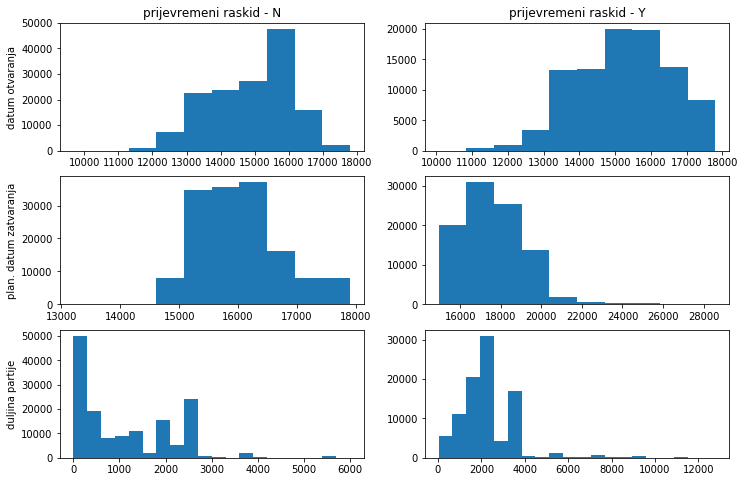

In [38]:
data_basic_featuresOPV(data_basic_featuresA)
#datumi su dani u numeric obliku: broj dana od dana 1.1.1970.
#za orijentaciju: 
#17896 je 31.12.2018.
#14975 je 1.1.2011.

#FUNDAMENTALNO: U R biljeznici "ciscenje_filtered_dataseta.R" se moze vidjeti kako smo ocistili 
#sve one retke gdje planirani datum zatvaranja ILI datum zatvaranja nisu bili poznati.
#zasto? jer takvi nam ne daju nikakvu informaciju, naprosto ne mozemo generirati target varijablu
#prijevremeni raskid ako nemamo vrijednost od OBA dva featura.


#POSLJEDICA: zbog toga vidimo iz donjeg grafa da samo oni krediti koji su prijevremeno raskinuti 
#(label Y) mogu imati PLANIRANI DATUM ZATVARANJA>31.12.2018 (17896)


#takvo ponasanje se reflektira i na duljinu partije --> najdulje partije su sve Y

#za datume otvaranja ne mozemo uociti bitnu razliku u distribuciji.

# Distribucija Datum otvaranja, Planirani datum zatvaranja i Duljina partije za Depozite. 

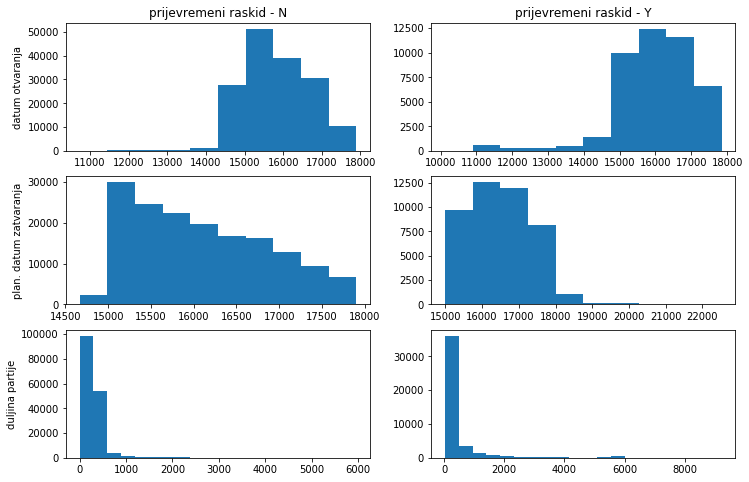

In [39]:
data_basic_featuresOPV(data_basic_featuresL)
#zakljucci isti kao za kredite

# Distribucija Valuta,Starost ,Visina kamate i Ugovoreni iznos za Kredite. 

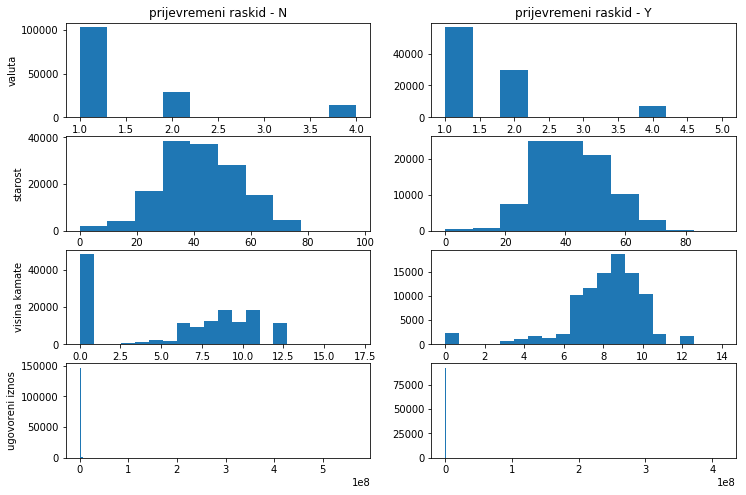

In [40]:
data_basic_featuresUSV(data_basic_featuresA)

#Za valute ne mozemo zakljuciti na bazi grafova nikakvo bitno odstupanje dviju distribucija, osim
#sto su se krediti sa valutom 2 nesto cesce prijevremeno raskinuli.

#distribucije starosti klijenata za kredite su gotovo identicne.

#za visinu kamate uocimo da krediti ugovoreni sa jako niskom kamatom uglavnom nisu bili prijevremeno 
#raskinuti: sto je logicno (ako klijent ima jako malu kamatu skoro pa nema nikakvu dobit da vrati,
#kredit prijevremeno jer nece skoro nista takvim postupkom ustediti)

#dok za prijevremeno raskinute kredite se situacija drasticno mijenja, dakle visina kamate 
#itekako utjece na prijevremeni raskid kredita, sto je i dalje jako logicno jer klijent veliki 
#postotak novaca ustedi ako vrati prijevremeno takve kredite.


# Distribucija Valuta, Starost, Visina kamate i Ugovoreni Iznos za Depozite. 

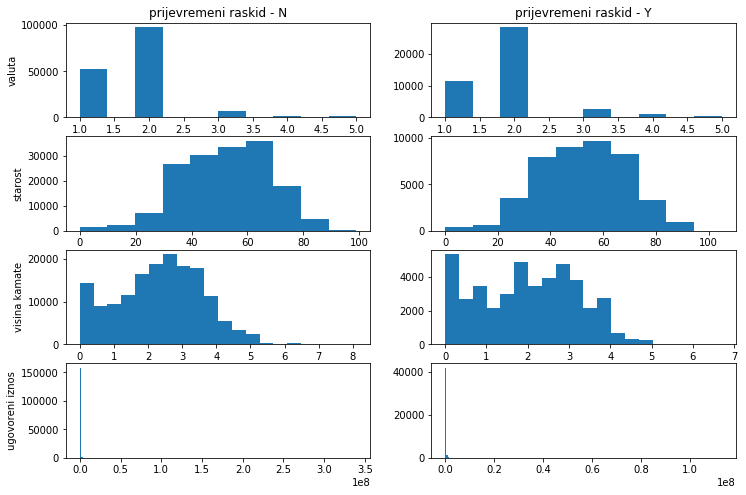

In [42]:
data_basic_featuresUSV(data_basic_featuresL)

#distribucije za valutu i starost za depozite su govoto identicne.

#distribucija za visinu kamate su isto dosta slicne, jedino moze se uociti obrnuto ponasanje od kredita
#depoziti koji imaju ugovorenu jako malu visinu kamate su uglavnom cesce prijevremeno raskinuti.
#razlog je opet logican: ako imam odredjeni novac na depozitu a taj novac mi daje jako malu kamatu,
#zasto bih uopce drzao taj novac u banci? bolje ga uzeti i investirati ga negdje.

In [43]:
data_basic_features.head(10)

,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID,DULJINA_PARTIJE
0,33820.0,163007,11816,15125,1.330964e+06,2,1120,FL1310,A,8.5,C,20.0,N,3309
1,1618.0,163116,11851,15523,7.341598e+06,2,1120,FL1310,A,0.0,B,20.0,N,3672
2,221009.0,163312,11915,15652,7.483237e+06,2,1120,FL1310,A,0.0,B,23.0,N,3737
3,85962.0,163577,12004,15030,7.933556e+05,2,1430,FL1500,A,6.0,C,15.0,N,3026
4,1061.0,163718,12038,15701,1.411624e+06,2,1120,FL1500,A,6.8,C,16.0,Y,3663
5,511687.0,163825,12079,15730,1.127470e+06,2,1430,FL1310,A,10.0,C,17.0,N,3651
6,33820.0,164109,12157,15784,8.354421e+05,2,1120,FL1310,A,8.5,C,22.0,N,3627
7,1196781.0,164426,12256,15876,2.850111e+07,2,1110,FL1400,A,0.0,B,2.0,Y,3620
8,4324.0,164527,12292,15891,7.442962e+06,2,1420,FE0100,A,0.0,B,33.0,N,3599
9,195391.0,164971,12408,16405,1.090687e+07,2,1110,FL1500,A,4.0,A,14.0,N,3997


In [44]:
import seaborn as sns
def data_basic_featuresCategories(data_basic_features,category): 
    plt.figure(figsize=(10, 8))
    if category=='PROIZVOD':
        sns.countplot(y=category,data=data_basic_features,hue='PRIJEVREMENI_RASKID');
    else:
        sns.countplot(x=category,data=data_basic_features,hue='PRIJEVREMENI_RASKID');

# Distribucija kategorijskih varijabli: Proizvod,Vrsta klijenta, Vrsta proizvoda i Tip kamate za Kredite

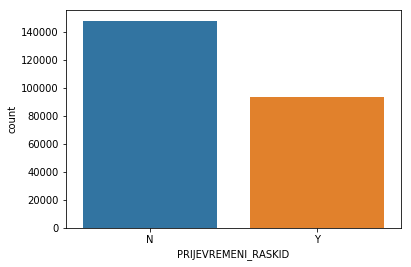

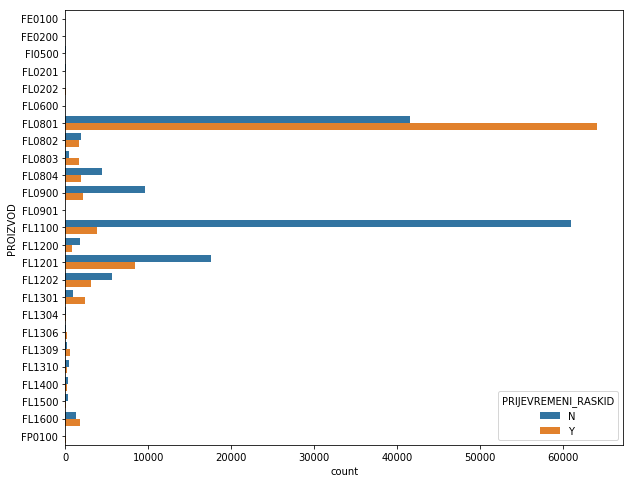

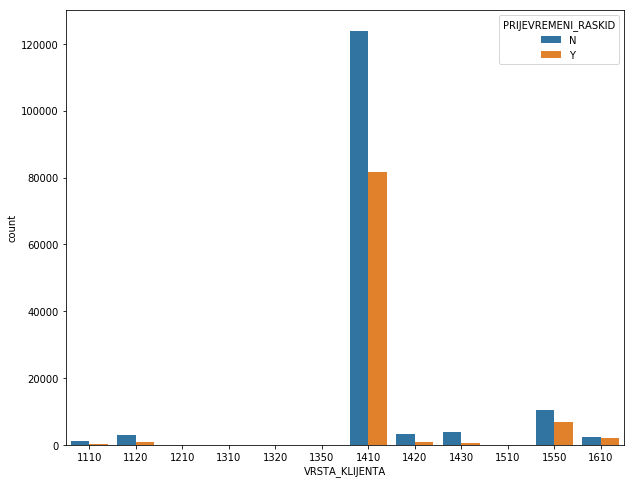

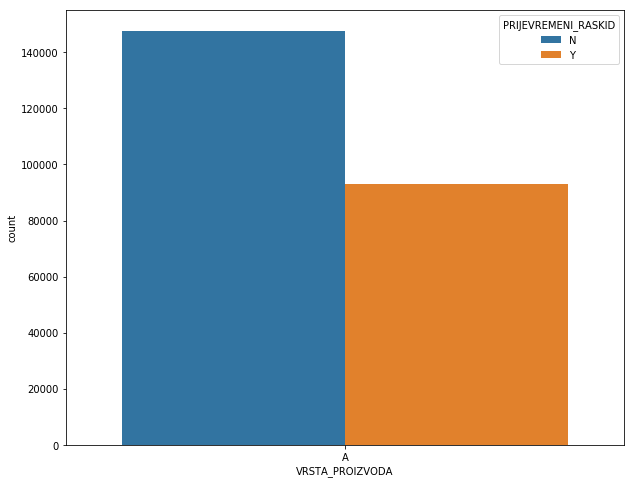

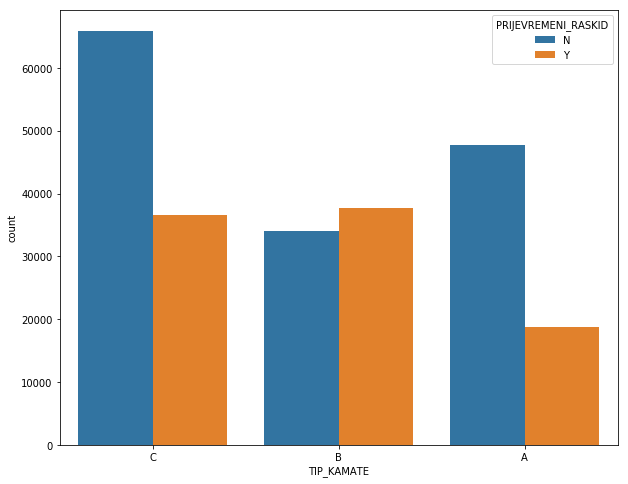

In [45]:
sns.countplot(x='PRIJEVREMENI_RASKID',data=data_basic_featuresA);
data_basic_featuresCategories(data_basic_featuresA,'PROIZVOD')
data_basic_featuresCategories(data_basic_featuresA,'VRSTA_KLIJENTA')
data_basic_featuresCategories(data_basic_featuresA,'VRSTA_PROIZVODA')
data_basic_featuresCategories(data_basic_featuresA,'TIP_KAMATE')

#Prvi plot je broj N i Y medju kreditima. Dakle sve kategorije koje imaju slican omjer (N/Y)
#se ne razlikuju znacajno po distribuciji.


#Iz kategorijske varijable proizvod posebno odskacu FL0801 gdje se cak javlja vise Y od N iako ih 
#ukupno ima manje (kao sto vidimo u prvom plotu po svim kreditima) i FL1100 gdje ima puno vise N od Y.
#ostali vise-manje imaju slicni omjer kao taj u prvom plotu.

#Iz kategorijske varijable vrsta klijenta ne odskace niti jedna kategorija.

#Iz kategorijske varijable vrsta proizvoda ne odskace niti jedna kategorija. (ta kategorija je cak 
#redundantna jer ju kategorijska varijabla proizvod opisuje u potpunosti (testirano u Ru))

#tip kamate B ima vise Y od N.


# Distribucija kategorijskih varijabli: Proizvod,Vrsta klijenta, Vrsta proizvoda i Tip kamate za Depozite

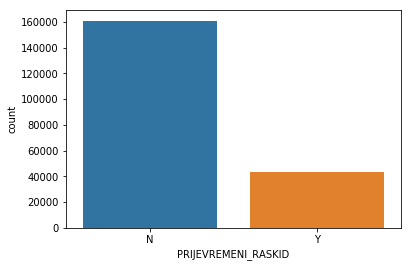

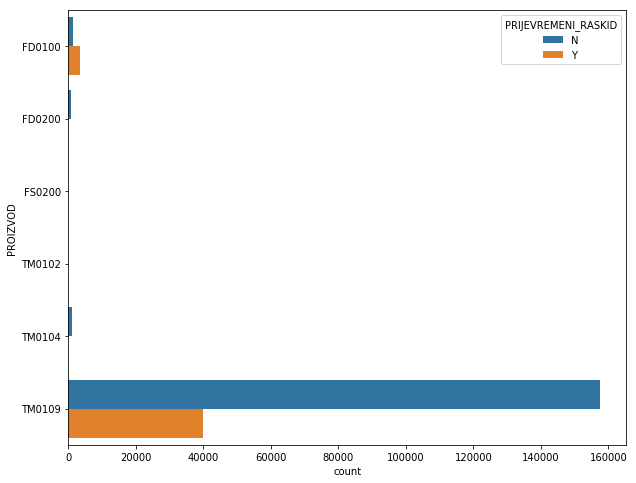

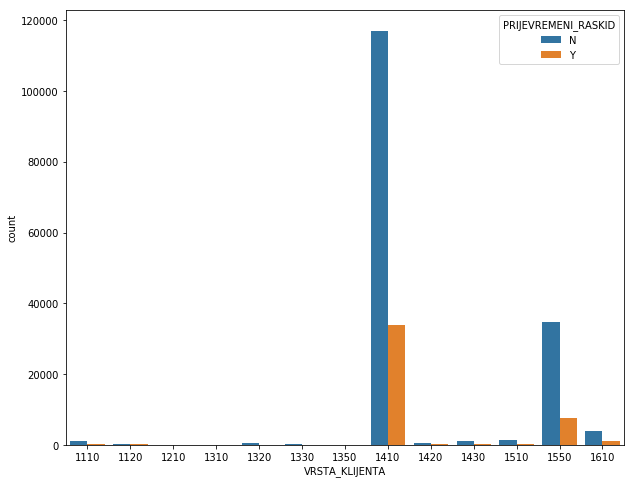

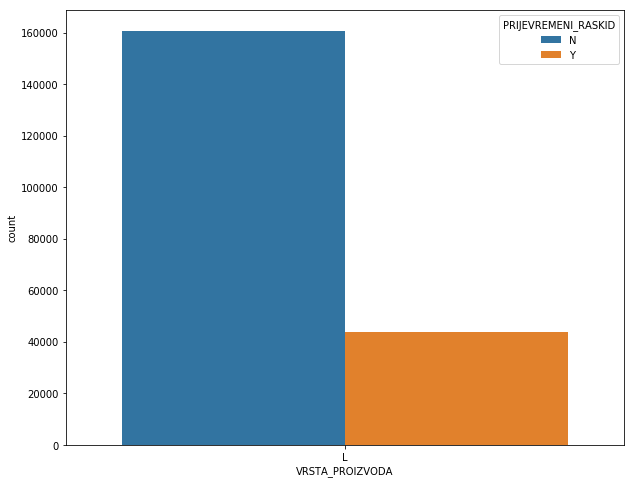

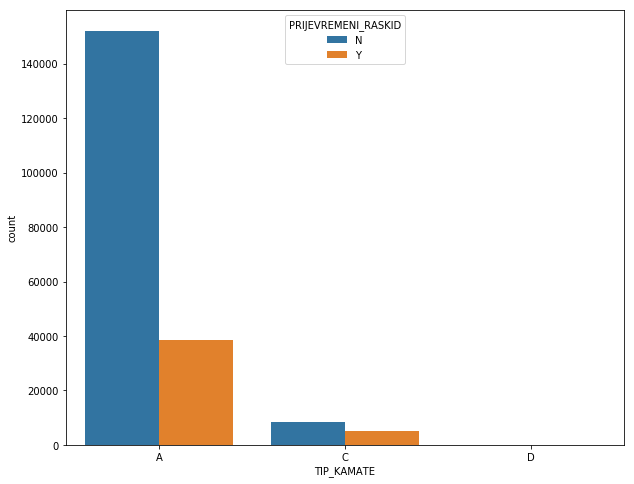

In [46]:
sns.countplot(x='PRIJEVREMENI_RASKID',data=data_basic_featuresL);
data_basic_featuresCategories(data_basic_featuresL,'PROIZVOD')
data_basic_featuresCategories(data_basic_featuresL,'VRSTA_KLIJENTA')
data_basic_featuresCategories(data_basic_featuresL,'VRSTA_PROIZVODA')
data_basic_featuresCategories(data_basic_featuresL,'TIP_KAMATE')

#Prvi plot je isto kao gore samo za Depozite.


#Iz kategorijske varijable proizvod posebno odskace FD0100 gdje se cak javlja vise Y od N iako ih 
#ukupno ima manje (kao sto vidimo u prvom plotu po svim kreditima).

#Iz kategorijske varijable vrsta klijenta ne odskace niti jedna kategorija.

#Iz kategorijske varijable vrsta proizvoda ne odskace niti jedna kategorija. (ta kategorija je cak 
#redundantna jer ju kategorijska varijabla proizvod opisuje u potpunosti (testirano u Ru))

#Iz kategorijske varijable tip kamate ne odskace niti jedna kategorija.



In [47]:
data_basic_featuresA.dtypes

KLIJENT_ID                     float64
OZNAKA_PARTIJE                   int64
DATUM_OTVARANJA                  int64
PLANIRANI_DATUM_ZATVARANJA       int64
UGOVORENI_IZNOS                float64
VALUTA                           int64
VRSTA_KLIJENTA                category
PROIZVOD                      category
VRSTA_PROIZVODA               category
VISINA_KAMATE                  float64
TIP_KAMATE                      object
STAROST                        float64
PRIJEVREMENI_RASKID           category
DULJINA_PARTIJE                  int64
VRSTA_KLIJENTA_cat                int8
PROIZVOD_cat                      int8
VRSTA_PROIZVODA_cat               int8
PRIJEVREMENI_RASKID_cat           int8
dtype: object

In [48]:
data_basic_featuresL.dtypes

KLIJENT_ID                     float64
OZNAKA_PARTIJE                   int64
DATUM_OTVARANJA                  int64
PLANIRANI_DATUM_ZATVARANJA       int64
UGOVORENI_IZNOS                float64
VALUTA                           int64
VRSTA_KLIJENTA                category
PROIZVOD                      category
VRSTA_PROIZVODA               category
VISINA_KAMATE                  float64
TIP_KAMATE                      object
STAROST                        float64
PRIJEVREMENI_RASKID           category
DULJINA_PARTIJE                  int64
VRSTA_KLIJENTA_cat                int8
PROIZVOD_cat                      int8
VRSTA_PROIZVODA_cat               int8
PRIJEVREMENI_RASKID_cat           int8
dtype: object

In [49]:
def prebaci_kategorije(data_basic_featuresA):
    data_basic_featuresA["VRSTA_KLIJENTA"] = data_basic_featuresA["VRSTA_KLIJENTA"].astype('category')
    data_basic_featuresA["VRSTA_KLIJENTA_cat"] = data_basic_featuresA["VRSTA_KLIJENTA"].cat.codes
    data_basic_featuresA["PROIZVOD"] = data_basic_featuresA["PROIZVOD"].astype('category')
    data_basic_featuresA["PROIZVOD_cat"] = data_basic_featuresA["PROIZVOD"].cat.codes
    data_basic_featuresA["VRSTA_PROIZVODA"] = data_basic_featuresA["VRSTA_PROIZVODA"].astype('category')
    data_basic_featuresA["VRSTA_PROIZVODA_cat"] = data_basic_featuresA["VRSTA_PROIZVODA"].cat.codes
    data_basic_featuresA["PRIJEVREMENI_RASKID"] = data_basic_featuresA["PRIJEVREMENI_RASKID"].astype('category')
    data_basic_featuresA["PRIJEVREMENI_RASKID_cat"] = data_basic_featuresA["PRIJEVREMENI_RASKID"].cat.codes


prebaci_kategorije(data_basic_featuresA)
prebaci_kategorije(data_basic_featuresL)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

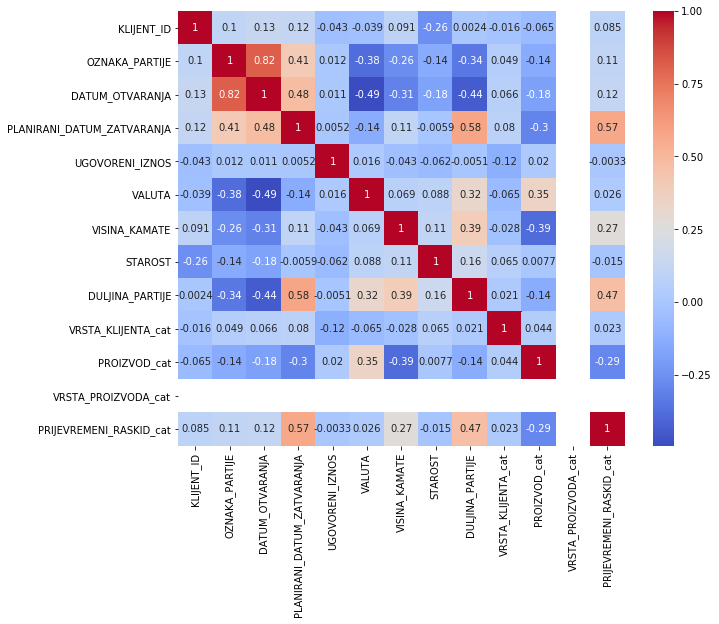

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_basic_featuresA.corr(),cmap='coolwarm',annot=True);


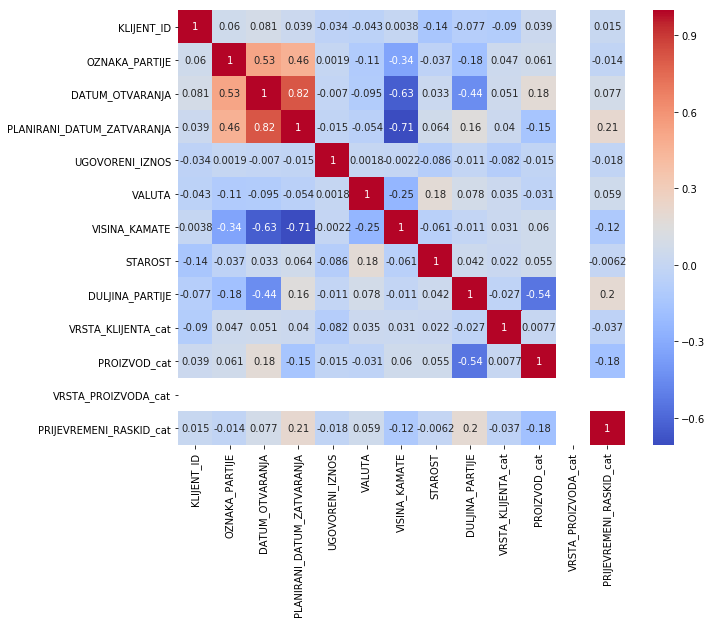

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_basic_featuresL.corr(),cmap='coolwarm',annot=True);

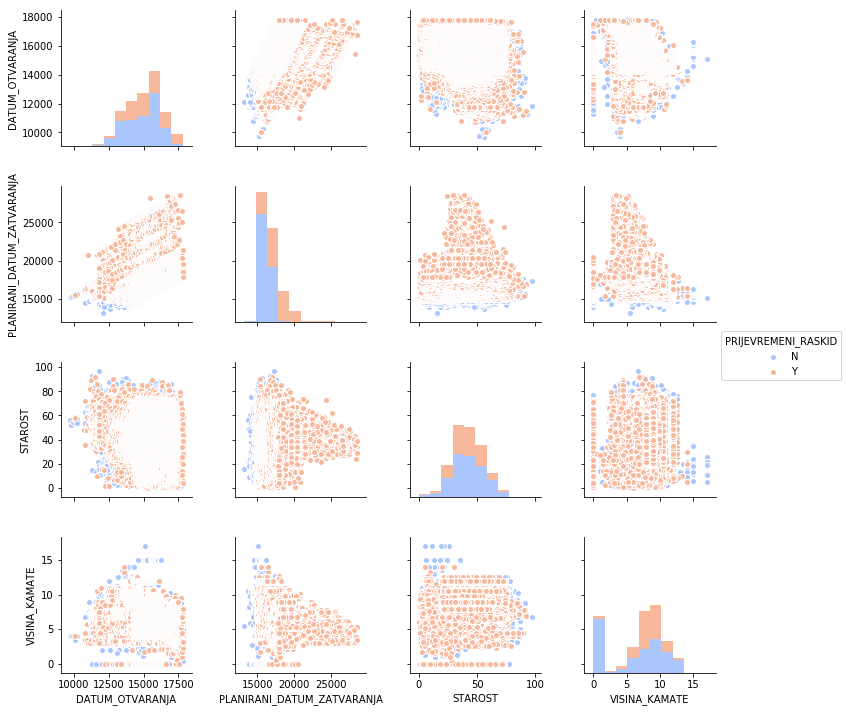

In [55]:
#data_basic_features=data[['KLIJENT_ID','OZNAKA_PARTIJE','DATUM_OTVARANJA','PLANIRANI_DATUM_ZATVARANJA','UGOVORENI_IZNOS','VALUTA','VRSTA_KLIJENTA','PROIZVOD','VRSTA_PROIZVODA','VISINA_KAMATE','TIP_KAMATE','STAROST','PRIJEVREMENI_RASKID','DULJINA_PARTIJE']]
data_basic_featuresAm=data_basic_featuresA[['DATUM_OTVARANJA','PLANIRANI_DATUM_ZATVARANJA','STAROST','VISINA_KAMATE','PRIJEVREMENI_RASKID']]
sns.pairplot(data_basic_featuresAm,hue='PRIJEVREMENI_RASKID',palette='coolwarm');

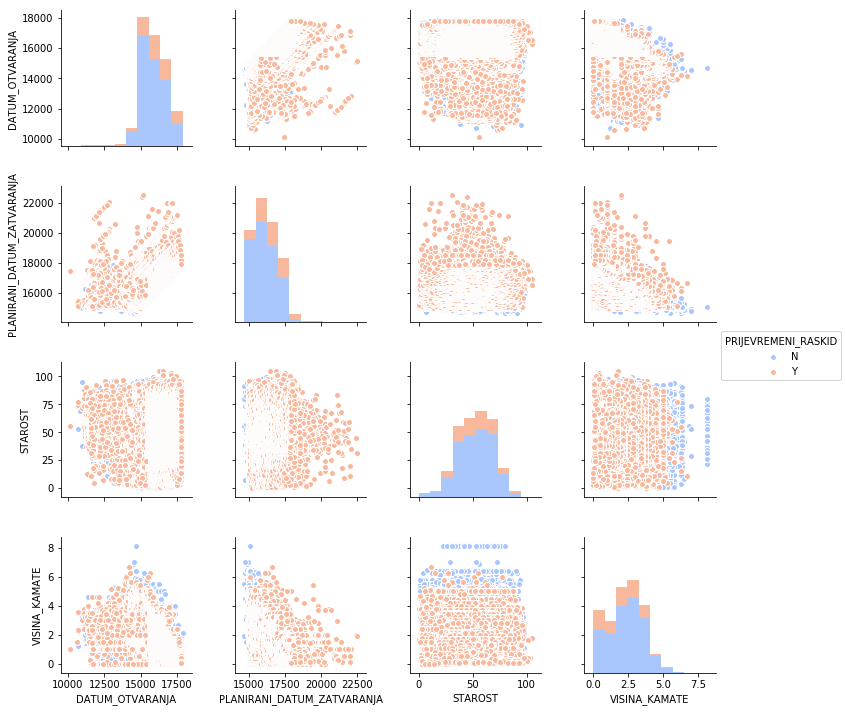

In [56]:
data_basic_featuresLm=data_basic_featuresL[['DATUM_OTVARANJA','PLANIRANI_DATUM_ZATVARANJA','STAROST','VISINA_KAMATE','PRIJEVREMENI_RASKID']]
sns.pairplot(data_basic_featuresLm,hue='PRIJEVREMENI_RASKID',palette='coolwarm');

# Vaznost planiranih datuma zatvaranja iz buducnosti i stvarni nacin rjesavanja problema.

## U gornjem dijelu smo uocili kako planirani datumi zatvaranja mogu biti samo Y (jer ako su N onda njihov datum zatvaranja nije poznat pa nemamo nikakvu informaciju za takvu partiju i moramo ju brisati). 
## Jedno rjesenje bi moglo biti brisanje svih planiranih datuma zatvaranja poslije tog datuma, ali cemo na taj nacin izgubiti bitnu informaciju u dataset i uvesti nekakvo ne random slabo opravdano brisanje.
## Zapravo jedino sto ima smisla brisati je po datumu otvaranja. Jer tada zapravo samo gledamo kredite koji su otvoreni prije odredjenog datuma dakle uzimamo smisleni undersample. Ideja je uzeti takav datum otvaranja gdje su skoro sve (po mogucnosti sve) partije koje su otvorene prije tog datuma vec i prirodno zavrsile do 31.12.2018 sto gornji granica perioda kojeg smo dobili.
## Nasli smo takav datum u broju 15100 sto je 6.5.2011. jer 96% svih partija koje su otvorene do tog datuma imaju i planirani datum zatvaranja koji se dogodio prije 31.12.2018.

In [57]:
data_basic_features_NOBIAS=data_basic_features.loc[data_basic_features['DATUM_OTVARANJA'] < 15100];
data_basic_featuresA_NOBIAS=data_basic_features_NOBIAS.loc[data_basic_features_NOBIAS['VRSTA_PROIZVODA'] == 'A'];
data_basic_featuresL_NOBIAS=data_basic_features_NOBIAS.loc[data_basic_features_NOBIAS['VRSTA_PROIZVODA'] == 'L'];
print(data_basic_featuresA_NOBIAS.shape)
print(data_basic_featuresL_NOBIAS.shape)
print(data_basic_features_NOBIAS.shape)
data_basic_featuresA_NOBIAS.describe()

(111508, 14)
(42024, 14)
(153532, 14)


,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST,DULJINA_PARTIJE
count,1.115080e+05,1.115080e+05,111508.000000,111508.000000,1.115080e+05,111508.000000,111508.000000,111508.000000,111508.000000,111508.000000
mean,6.833018e+05,2.953162e+06,13911.331797,16138.900590,1.751955e+05,1.907764,1415.476199,8.421454,43.909155,2227.568793
std,3.416151e+05,1.804071e+06,757.410270,1077.698252,3.809577e+06,1.125456,47.491007,2.418390,13.089068,1173.518750
min,1.002000e+03,1.630070e+05,9680.000000,13204.000000,5.000000e+02,1.000000,1110.000000,0.000000,1.000000,0.000000
25%,4.183328e+05,1.389892e+06,13473.000000,15370.000000,3.100000e+04,1.000000,1410.000000,7.260000,34.000000,1566.000000
50%,7.190245e+05,1.732189e+06,13909.000000,15917.000000,5.500000e+04,2.000000,1410.000000,9.100000,43.000000,2556.000000
75%,9.581870e+05,4.725000e+06,14543.000000,16555.000000,8.630318e+04,2.000000,1410.000000,10.100000,54.000000,2577.000000
max,1.794411e+06,6.029691e+06,15099.000000,26052.000000,5.696127e+08,5.000000,1610.000000,17.000000,97.000000,10988.000000


In [58]:
data_basic_features_NOBIAS.loc[data_basic_features_NOBIAS['PLANIRANI_DATUM_ZATVARANJA']<17896].shape[0]/data_basic_features_NOBIAS.shape[0]
# 95.9% podataka su prirodno zavrsili prije 31.12.2018

0.9590443686006825

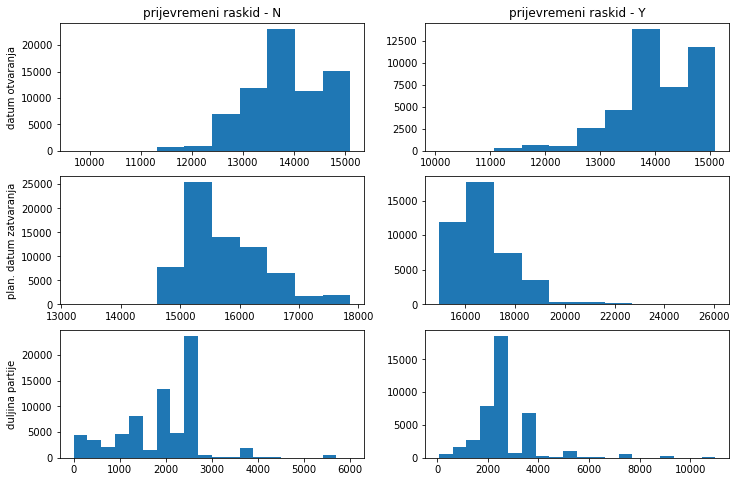

In [59]:
data_basic_featuresOPV(data_basic_featuresA_NOBIAS)

#Uocimo da je situacija sada rijesena odnosno imamo jako mali dio podataka (samo 4% kako izracunato)
#koji su "umjetni" Y. Dakle ovi podatci skoro pa nemaju bias Y za visoke planirane datume zatvaranja.
#(datume vece od 17896 = 31.12.2018. )

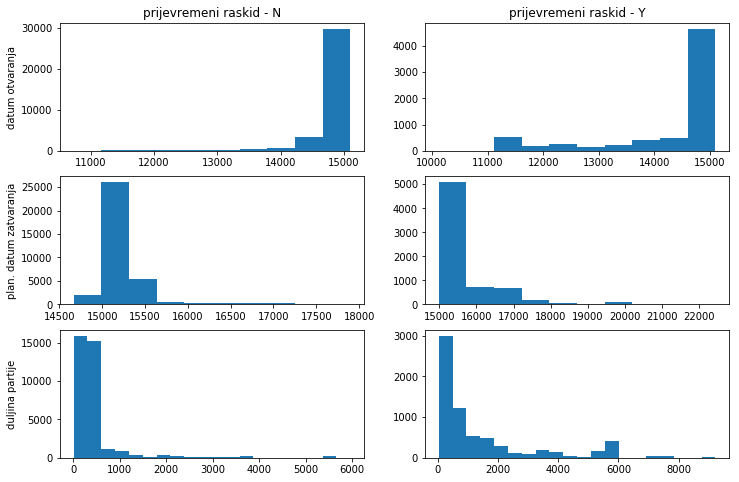

In [60]:
data_basic_featuresOPV(data_basic_featuresL_NOBIAS)

#Uocimo da je situacija sada rjesena odnosno imamo jako mali dio podataka (samo 4% kako izracunato)
#koji su "umjetni" Y. Dakle ovi podatci skoro pa nemaju bias Y za visoke datume.

In [61]:
prebaci_kategorije(data_basic_featuresA_NOBIAS)
prebaci_kategorije(data_basic_featuresL_NOBIAS)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(111508, 18)


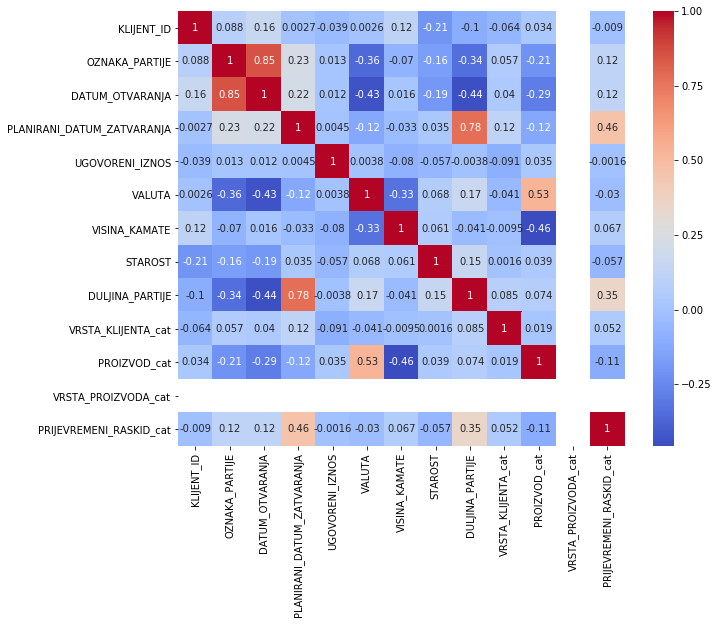

In [62]:
data_basic_featuresA_NOBIAS.loc[data_basic_featuresA_NOBIAS['PLANIRANI_DATUM_ZATVARANJA']<17896]
plt.figure(figsize=(10, 8))
sns.heatmap(data_basic_featuresA_NOBIAS.corr(),cmap='coolwarm',annot=True);
print(data_basic_featuresA_NOBIAS.shape)

(42024, 18)


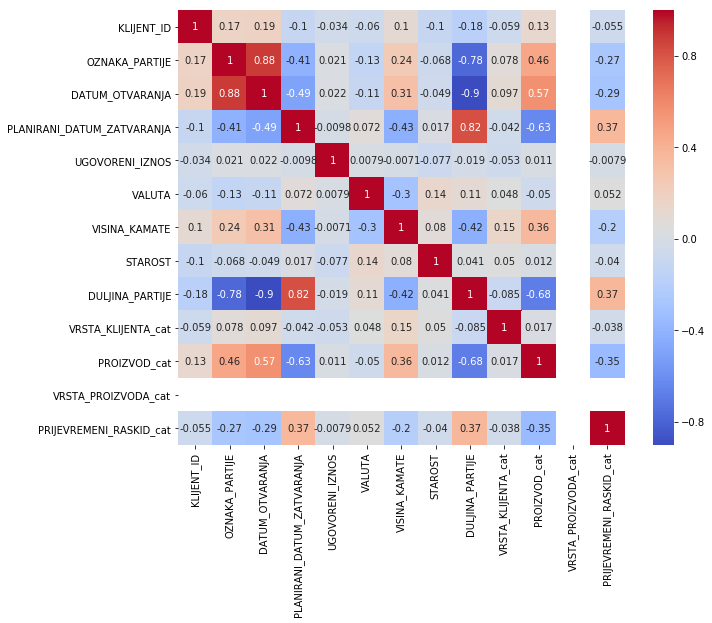

In [63]:
data_basic_featuresL_NOBIAS.loc[data_basic_featuresL_NOBIAS['PLANIRANI_DATUM_ZATVARANJA']<17896]
plt.figure(figsize=(10, 8))
sns.heatmap(data_basic_featuresL_NOBIAS.corr(),cmap='coolwarm',annot=True);
print(data_basic_featuresL_NOBIAS.shape)

# VREMENSKI NIZOVI i POTENCIJALNA PRIMJENA

In [64]:
file_name = 'C:/Users/User/Desktop/MOZGALO/MOZGALO2019/training_time_series.csv'
vremenski, columns_vremenski = read_data (file_name)

Index(['Unnamed: 0', 'OZNAKA_PARTIJE', '2010-12-31', '2011-03-31',
       '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31', '2012-06-30',
       '2012-09-30', '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30',
       '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
       '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
       '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31', '2017-06-30',
       '2017-09-30', '2017-12-31', '2018-03-31', '2018-06-30', '2018-09-30',
       '2018-12-31'],
      dtype='object')


In [65]:
vremenski.head(200)

,Unnamed: 0,OZNAKA_PARTIJE,2010-12-31,2011-03-31,2011-06-30,2011-09-30,2011-12-31,2012-03-31,2012-06-30,2012-09-30,...,2016-09-30,2016-12-31,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31
0,1,163007,62247.44,25016.17,0.00,0.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,163116,1433896.97,1225548.85,818931.34,829946.53,571026.02,415824.80,208136.01,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,163312,1477034.60,1308995.37,1121628.29,950705.21,764680.41,571555.49,380868.19,189228.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,163396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,5,163577,27696.64,28848.41,30024.43,0.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,163718,372587.89,334470.83,277876.60,254569.00,213180.93,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,163825,232728.96,206551.08,178137.13,152419.74,124520.01,95501.12,66879.24,37938.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,164109,187981.43,167336.64,146591.42,127423.59,107202.98,85205.74,63982.32,42271.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,164426,7510462.45,0.00,0.00,0.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,164527,2769439.88,2350809.26,2349390.44,1911822.52,1921334.40,1435787.36,1434067.41,948592.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
Primjer=vremenski.iloc[199]
#odgovara oznaci partije 271046

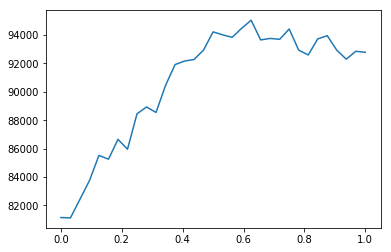

In [67]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 1, len(Primjer)-2)
ax.plot(x, Primjer[2:len(Primjer)]);